In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import seaborn as sns
from matplotlib import pyplot

import cv2


In [2]:
!wget nipg1.inf.elte.hu:8765/fer2013.csv

--2021-10-31 06:50:31--  http://nipg1.inf.elte.hu:8765/fer2013.csv
Resolving nipg1.inf.elte.hu (nipg1.inf.elte.hu)... 157.181.160.161
Connecting to nipg1.inf.elte.hu (nipg1.inf.elte.hu)|157.181.160.161|:8765... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301072766 (287M) [text/csv]
Saving to: ‘fer2013.csv’

fer2013.csv         100%[===================>] 287.12M  23.1MB/s    in 13s     

2021-10-31 06:50:45 (22.5 MB/s) - ‘fer2013.csv’ saved [301072766/301072766]



In [3]:
 x_train, train_y, x_test, test_y=[], [], [], []

In [4]:
df = pd.read_csv('/content/fer2013.csv')

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


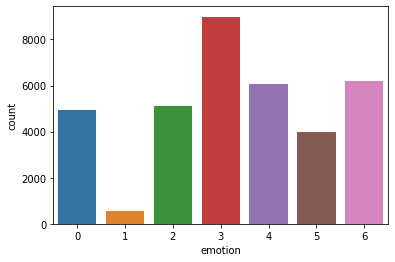

In [6]:
df.emotion.unique() # array([0, 2, 4, 6, 3, 5, 1])

df.emotion.value_counts()

# OUTPUT
'''
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64
'''

sns.countplot(df.emotion)
pyplot.show()

In [7]:
emotion_label_to_text = {
  0: 'anger',
  1: 'disgust',
  2: 'fear',
  3: 'happiness',
  4: 'sadness',
  5: 'surprise',
  6: 'neutral'
}

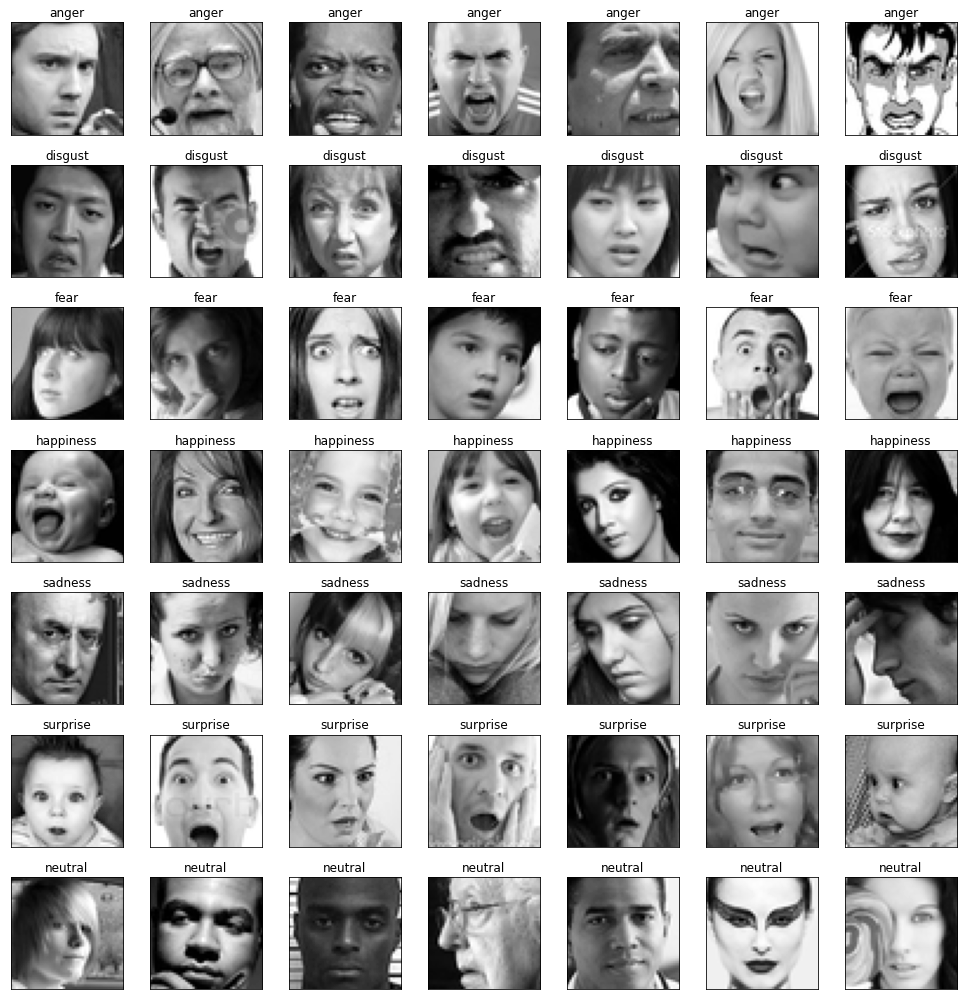

In [8]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

In [9]:
for index, row in df.iterrows():
  val=row['pixels'].split(" ")
  try:
    if 'Training' in row['Usage']:
      x_train.append(np.array(val, 'float32'))
      train_y.append(row['emotion'])
    elif 'PublicTest' in row['Usage']:
        x_test.append(np.array(val, 'float32'))
        test_y.append(row['emotion'])
  except:
     print(f"error occured at index :{index} and row:{row}")   

In [10]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width, height = 48, 48


In [11]:
x_train = np.array(x_train, 'float32')
train_y = np.array(train_y, 'float32')
x_test = np.array(x_test, 'float32')
test_y = np.array(test_y, 'float32')

In [12]:
from keras.utils.np_utils import  to_categorical

In [13]:
train_y = to_categorical(train_y, num_classes=num_labels)
test_y = to_categorical(test_y, num_classes=num_labels)

In [14]:
#normalize data
x_train -= np.mean(x_train, axis=0)
x_train /= np.std(x_train, axis=0)

x_test -= np.mean(x_test, axis=0)
x_test /= np.std(x_test, axis=0)

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

In [15]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

from keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import  keras

In [16]:
#building the model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(x_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0

In [17]:
#compile the model
model.compile(loss=categorical_crossentropy,
              optimizer='sgd',
              metrics = ['accuracy'])

In [18]:
#training our model
history = model.fit(x_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, test_y),
          shuffle= True)

Epoch 1/50
449/449 [==============================] - 49s 41ms/step - loss: 1.8301 - accuracy: 0.2460 - val_loss: 1.8205 - val_accuracy: 0.2494
Epoch 2/50
449/449 [==============================] - 18s 39ms/step - loss: 1.7991 - accuracy: 0.2523 - val_loss: 1.8001 - val_accuracy: 0.2469
Epoch 3/50
449/449 [==============================] - 18s 39ms/step - loss: 1.7858 - accuracy: 0.2562 - val_loss: 1.7916 - val_accuracy: 0.2522
Epoch 4/50
449/449 [==============================] - 18s 39ms/step - loss: 1.7748 - accuracy: 0.2604 - val_loss: 1.7873 - val_accuracy: 0.2527
Epoch 5/50
449/449 [==============================] - 18s 39ms/step - loss: 1.7647 - accuracy: 0.2662 - val_loss: 1.7670 - val_accuracy: 0.2708
Epoch 6/50
449/449 [==============================] - 18s 39ms/step - loss: 1.7469 - accuracy: 0.2839 - val_loss: 1.7554 - val_accuracy: 0.2903
Epoch 7/50
449/449 [==============================] - 18s 39ms/step - loss: 1.7190 - accuracy: 0.3055 - val_loss: 1.7061 - val_accuracy:

In [19]:
#save the model
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
  json_file.write(fer_json)
model.save_weights("fer.h5")

In [20]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [24]:
model = model_from_json(open("fer.json", "r").read())
model.load_weights('fer.h5')
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

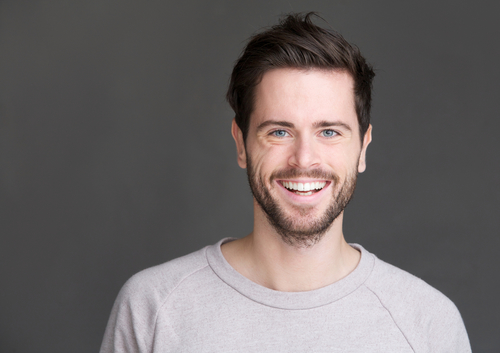

In [49]:

from google.colab.patches import cv2_imshow
import cv2

test_image = cv2.imread('/content/happy.jpg')
cv2_imshow(test_image)



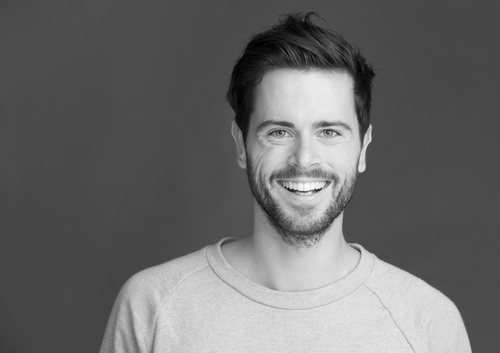

In [50]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

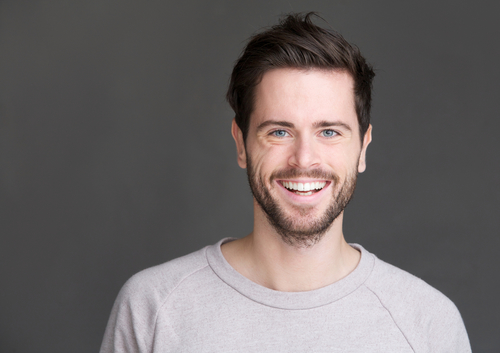

In [51]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
from keras.preprocessing.image import img_to_array
cv2_imshow(test_image)

happy


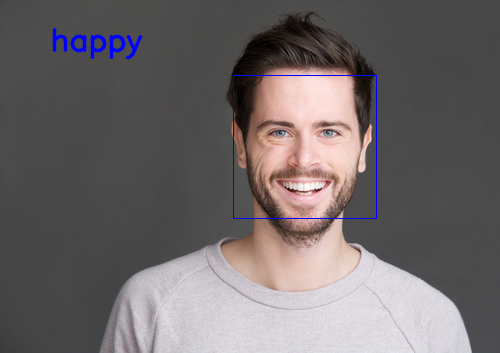

In [52]:
faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)

#rectangle
for (x, y, w, h) in faces:
  cv2.rectangle(test_image, (x,y), (x+w,y+h), (255,0,0))
  roi_gray = gray_image[y:y+w, x:x+h]
  roi_gray = cv2.resize(roi_gray, (48,48))
  image_pixels = img_to_array(roi_gray)
  image_pixels = np.expand_dims(image_pixels, axis=0)
  image_pixels /= 255
  predictions = model.predict(image_pixels)
  max_index = np.argmax(predictions[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]

  #cv2.putText(resize_image, emotion_prediction, (int(x), int(y)))

  print(emotion_prediction)

  #resize_image = cv2.resize(test_image, (1000, 700))
  #cv2_imshow(resize_image)

  font = cv2.FONT_HERSHEY_SIMPLEX
  org =(50, 50)
  fontScale = 1
  color = (255, 0, 0)
  thickness = 2
  image = cv2.putText(test_image, emotion_prediction, org, font,
                      fontScale, color, thickness, cv2.LINE_AA)
  cv2_imshow(image)
